In this notebook, you will find the code to predicting breast cancer in a datatset using the Support Vector Machines classifier. The algorithm, finds a hyperplane between two classifications in a higher dimensional space by using a kernel function. We will also look at the implementation of Logistic Regression, as both the algorithms are designed for classifcation and compare the accuracy scores. 

**Step 1: Import the necesary modules.**

In [5]:
import numpy as np # For efficiently carrying out array computations 
import pandas as pd # For CSV I/O 
import matplotlib.pyplot as plt # For data visualization. 
import seaborn as sns # For data visualization as well.
import sklearn


# Importing the necessary algorithms and error functions. 
from sklearn.preprocessing import MinMaxScaler, StandardScaler # For feature scaling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# For splitting the datasets and finding the best model using GridSearch
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
# For finding the error of the algorithm trained. 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# The algorithm itself. 


**Step 2: Loading the data and getting a feel for it.**

In [6]:
df = pd.read_csv('breast-cancer.csv') # Loading the data
df.head()
# df.describe() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Step 3: Analyze the dataset.** 
* This involves various data visualizations to find the hidden relationships between each variable. 

In [7]:
df['diagnosis'] = [1 if i == "M" else 0 for i in df['diagnosis']]
df.drop('id', axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


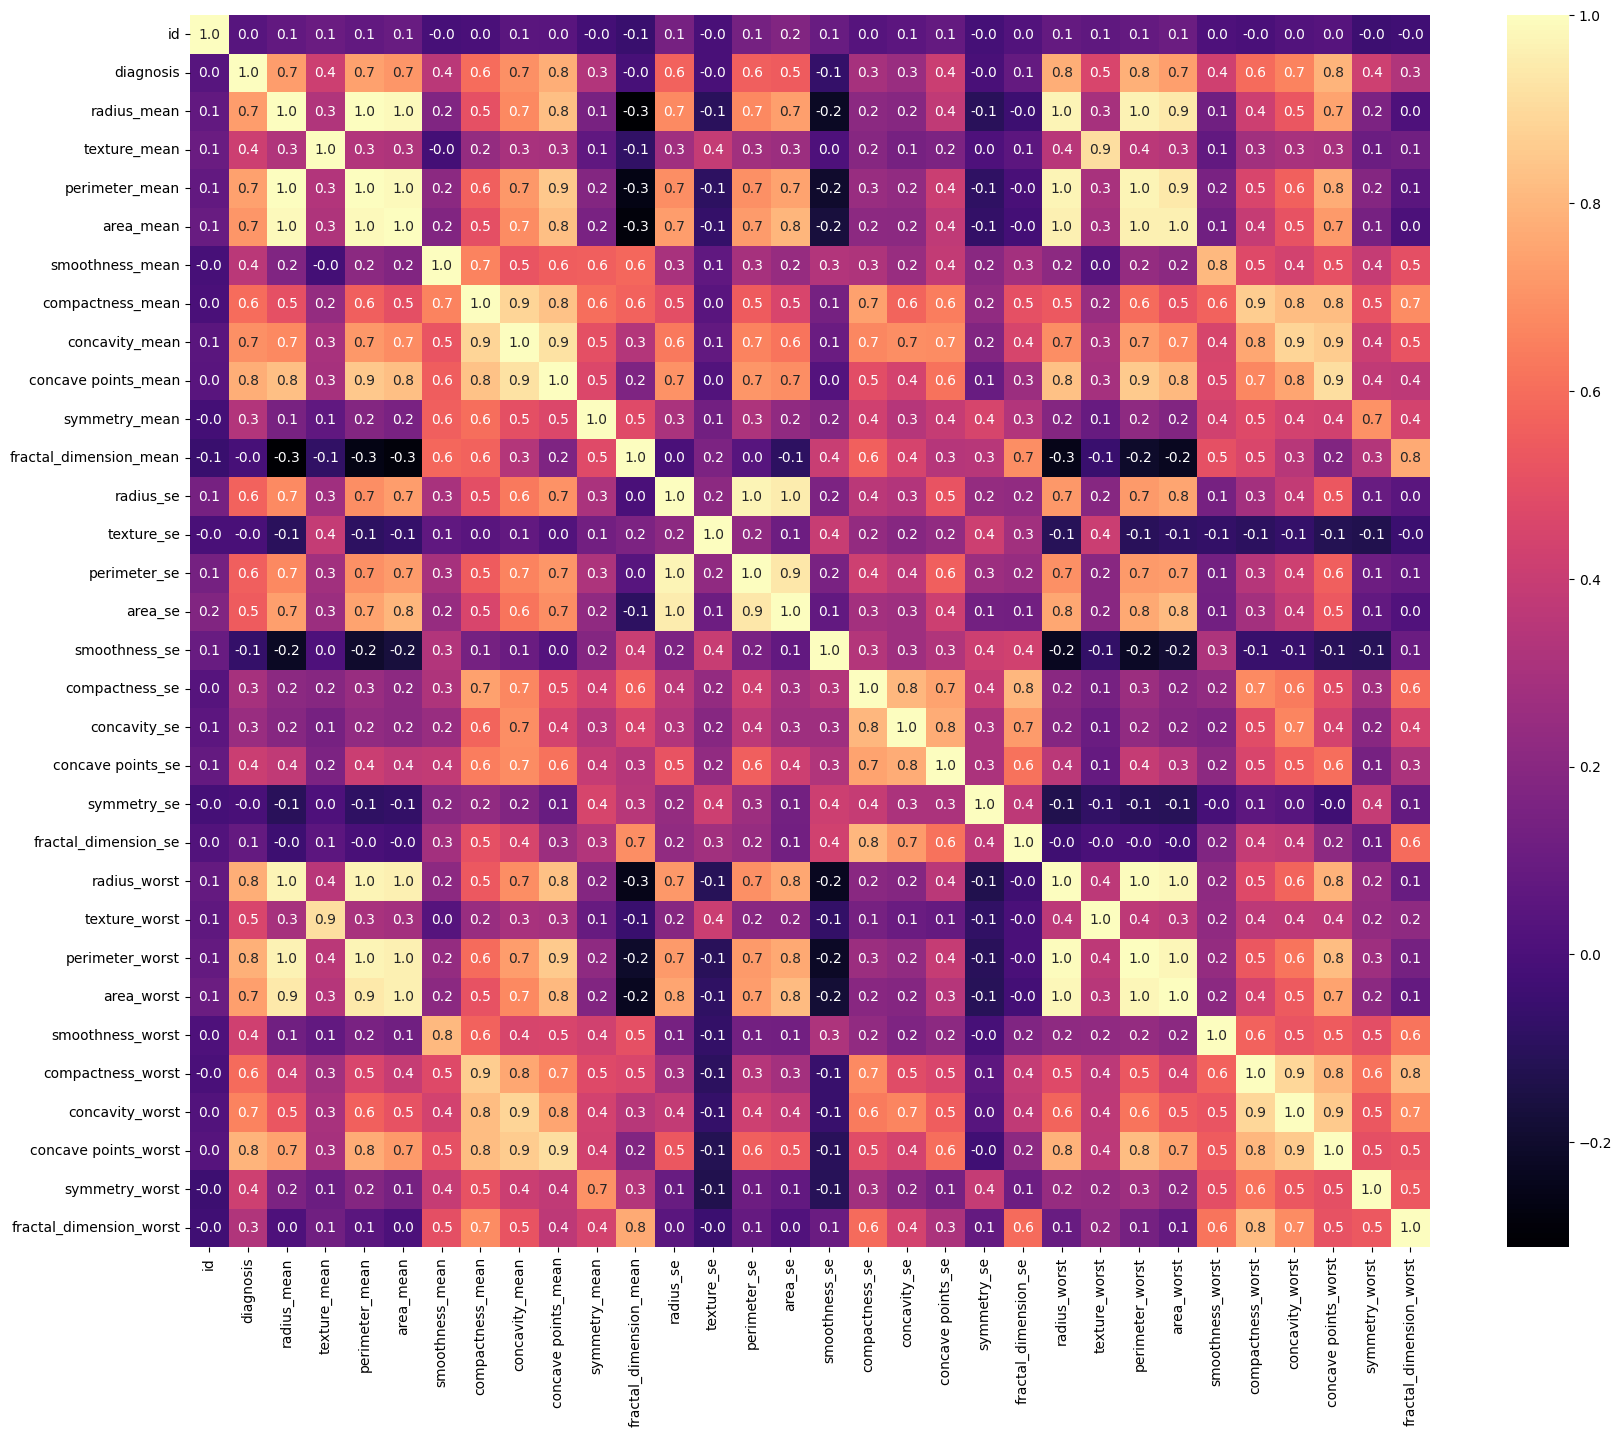

In [8]:
corr = df.corr()
fig = plt.figure(figsize = (20, 16))
sns.heatmap(corr, annot=True, 
           cmap='magma', 
           fmt=".1f")
plt.show()

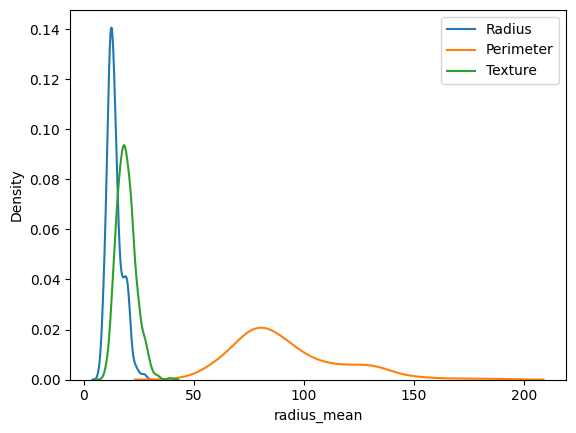

In [9]:
fig, ax = plt.subplots()
sns.kdeplot(df['radius_mean'], label="Radius")
sns.kdeplot(df['perimeter_mean'], label = "Perimeter")
sns.kdeplot(df['texture_mean'], label = "Texture")
ax.legend()

**Step 4: Preprocess the data**
* This involves feature scaling so that the algorithm works better for the given dataset. 

In [10]:
corr_val = abs(corr["diagnosis"])
#Select only the highly correlated values. 
relevant = corr_val[corr_val > 0.4]
relevant = list(corr_val.index)
relevant.remove("id")
relevant.remove("diagnosis")

X = df[relevant]
Y = df["diagnosis"]

# print(X)
# print(Y)

# We got confirmation that by printing these lists, we have the values we need. 

In [11]:
# Now, we will perform feature scaling for the dataset "X" using StandardScaler and convert the list to a dataframe
X = StandardScaler().fit_transform(X) # mean = 0, standard deviation = 1
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


**Step 5: Splitting the training and testing data, as well as finding the best model parameters for SVM.**
* This is the second-to-last step before completing the program, whewre the last step will be to find the model with the least amount of error and print that onto the console. 

In [12]:
# Splitting X and Y into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [13]:
# To find the best model, we use a variety of arguments. 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # For splitting the datasets in the same proportion
svc = SVC()
svc_args = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

best_model = GridSearchCV(estimator = svc,
                          param_grid = svc_args,
                          cv = cv, 
                          verbose = 1, 
                          scoring = 'roc_auc')

result_svc = best_model.fit(x_train, y_train)
result_svc.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

The result: 
* C: 100
* gamma: 0.001
* kernel: rbf (radial basis function)

are the three best fitted parameters for the Support Vectors Classifier. It was much easier to use GridSearchCV than manually altering each C, gamma and kernel value in 
order to get the right output. 

In [14]:
# Using the best parameters gotten from GridSearch, we are training the SVC algorithm on those params. 
svc = svc.set_params(**result_svc.best_params_)
svc.fit(x_train, y_train)

#Getting the parameters and finding the predictions using the testing dataset.
prediction = svc.predict(x_test) 
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(f"ROC-AUC Score: {roc_auc_score(y_test, prediction)}")
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.98      0.96      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[88  1]
 [ 2 52]]
ROC-AUC Score: 0.9758635039533915
Accuracy Score: 0.9790209790209791


As you can see, we have ended up with a 97% accuracy score, which is quite good. The algorithm has done well. 

**COMPARISON: Logistic Regression vs. Support Vector Machine**
* This is an extra: This isn't required. Both algorithms are used for classifiacation problems, and to me at least, it's interesting to see which algorithm does the job better. 

In [15]:
log_regr = LogisticRegression() 

log_args = {
    'penalty':['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 0.9, 1, 2, 10, 100],
    'solver': ['newton-cg', 'lbfgs''liblinear', 'sag', 'saga']
}

grid_lgr = GridSearchCV(estimator = log_regr, 
                        param_grid = log_args, 
                        cv = cv, 
                        verbose = 1, 
                        scoring = 'roc_auc')
result_lgr = grid_lgr.fit(x_train, y_train)
result_lgr.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

{'C': 2, 'penalty': 'l2', 'solver': 'newton-cg'}

In [16]:
log_regr = log_regr.set_params(**result_lgr.best_params_)
log_regr.fit(x_train, y_train)
prediction = log_regr.predict(x_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))
print(f"ROC-AUC Score: {roc_auc_score(y_test, prediction)}")
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[87  2]
 [ 1 53]]
ROC-AUC Score: 0.9795047856845608
Accuracy Score: 0.9790209790209791


**Final Results**: 
* Accuracy Score (SVC): 97.902%
* Accuracy Score (LGR): 97.902%

Both the classification algorithms have the same accuracy score and very similar confusion matrices, with SVC showing more precision but insignificantly. 

* Notebook by Akshath Mangudi
* Inspiration and references drawn from: https://www.kaggle.com/code/gevorgakopyan/98-7-breast-cancer-dataset-svm-knn-randomforest
* **End of Notebook**